# Keras tutorial

https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

Using TensorFlow backend.


In [3]:
from keras.layers import Convolution2D, MaxPooling2D

In [4]:
from keras.utils import np_utils

In [5]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print X_train.shape

(60000, 28, 28)


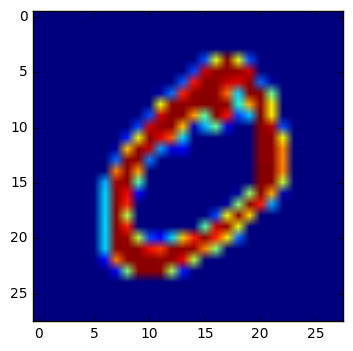

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

### Change images data array shape for Theano backend

Need to define images depth as 2-nd shape dimension.

In [8]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [9]:
print X_train.shape
print X_test.shape

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [10]:
# Convert to float32 and normalise to range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
print y_train.shape
print y_train[:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


## Convert labels to 10 distinct class labels (one-hot)

In [12]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
print Y_train.shape
# (60000, 10)

(60000, 10)


# Step 7. Define model architecture

In [14]:
model = Sequential()

*dim_ordering="th" needed:*  
*https://github.com/fchollet/keras/issues/3945*,  
*ref: https://keras.io/layers/convolutional/#convolution2d*

dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3. It defaults to the image_dim_ordering value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "tf".

In [15]:
model.add(Convolution2D(32, 3, 3, activation='relu',
                        dim_ordering="th", input_shape=(1,28,28)))

In [16]:
print model.output_shape

(None, 32, 26, 26)


In [17]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 9. Fit model on training data

In [20]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 252s - loss: 0.2687 - acc: 0.9181   
Epoch 2/10
60000/60000 [==============================] - 252s - loss: 0.1146 - acc: 0.9666   
Epoch 3/10
60000/60000 [==============================] - 254s - loss: 0.0871 - acc: 0.9739   
Epoch 4/10
60000/60000 [==============================] - 252s - loss: 0.0715 - acc: 0.9796   
Epoch 5/10
60000/60000 [==============================] - 253s - loss: 0.0613 - acc: 0.9814   
Epoch 6/10
60000/60000 [==============================] - 250s - loss: 0.0548 - acc: 0.9829   
Epoch 7/10
60000/60000 [==============================] - 252s - loss: 0.0479 - acc: 0.9845   
Epoch 8/10
60000/60000 [==============================] - 256s - loss: 0.0432 - acc: 0.9866   
Epoch 9/10
60000/60000 [==============================] - 252s - loss: 0.0398 - acc: 0.9878   
Epoch 10/10
60000/60000 [==============================] - 250s - loss: 0.0390 - acc: 0.9879   


# Step 10. Evaluate model on test data

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print score

[0.03006193514176107, 0.99119999999999997]
